In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
participated_df =  pd.read_csv('/home/karush/code/karushp/practice/euro-data/euro2024-infographics/data/Uefa Euro Cup Participated Teams General Statistics.csv')
participated_df.head()

,Rank,Team,Participations,Played,Win,Draw,Loss,Goal_For,Goal_Against,Goal_Difference,Points,Points/match
0,1,Germany,12,49,26,12,11,72,48,24,90,1.84
1,2,France,9,39,20,9,10,62,44,18,69,1.77
2,3,Spain,10,40,19,11,10,55,36,19,68,1.70
3,4,Italy,9,38,16,16,6,39,27,12,64,1.68
4,5,Portugal,7,35,18,9,8,49,31,18,63,1.80


In [3]:
columns_keep = ['Rank', 'Team','Participations','Played','Win','Draw','Loss']
participated_df_filter = participated_df[columns_keep]
participated_df_filter

,Rank,Team,Participations,Played,Win,Draw,Loss
0,1,Germany,12,49,26,12,11
1,2,France,9,39,20,9,10
2,3,Spain,10,40,19,11,10
3,4,Italy,9,38,16,16,6
4,5,Portugal,7,35,18,9,8
5,6,Netherlands,9,35,17,8,10
6,7,Czech Republic,9,32,13,6,13
7,8,Russia,11,33,12,7,14
8,9,England,9,31,10,11,10
9,10,Croatia,5,18,8,5,5


In [4]:
participated_df_filter['Team'].replace("Turkey","Türkiye",inplace=True)
participated_df_filter['Team'].replace('Czech Republic',"Czechia")

/tmp/ipykernel_9122/2620336879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participated_df_filter['Team'].replace("Turkey","Türkiye",inplace=True)


0                 Germany
1                  France
2                   Spain
3                   Italy
4                Portugal
5             Netherlands
6                 Czechia
7                  Russia
8                 England
9                 Croatia
10                Denmark
11                Belgium
12                 Sweden
13                 Greece
14                Türkiye
15                  Wales
16                 Poland
17            Switzerland
18                 Serbia
19                Iceland
20                Hungary
21    Republic of Ireland
22                Romania
23               Scotland
24                 Norway
25               Slovakia
26               Bulgaria
27                Albania
28       Northern Ireland
29                Ukraine
30               Slovenia
31                Austria
32                 Latvia
Name: Team, dtype: object

In [5]:
# New rows to calculate Win, Loss and Draw Percentage on overall Euro games played
participated_df_filter['Win_percentage'] = round(participated_df_filter['Win']/participated_df_filter['Played'],4)*100
participated_df_filter['Loss_percentage'] = round(participated_df_filter['Loss']/participated_df_filter['Played'],4)*100
participated_df_filter['Draw_percentage'] = round(participated_df_filter['Draw']/participated_df_filter['Played'],4)*100

/tmp/ipykernel_9122/2874642043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participated_df_filter['Win_percentage'] = round(participated_df_filter['Win']/participated_df_filter['Played'],4)*100
/tmp/ipykernel_9122/2874642043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participated_df_filter['Loss_percentage'] = round(participated_df_filter['Loss']/participated_df_filter['Played'],4)*100
/tmp/ipykernel_9122/2874642043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [6]:
participated_df_filter.head()

,Rank,Team,Participations,Played,Win,Draw,Loss,Win_percentage,Loss_percentage,Draw_percentage
0,1,Germany,12,49,26,12,11,53.06,22.45,24.49
1,2,France,9,39,20,9,10,51.28,25.64,23.08
2,3,Spain,10,40,19,11,10,47.50,25.00,27.50
3,4,Italy,9,38,16,16,6,42.11,15.79,42.11
4,5,Portugal,7,35,18,9,8,51.43,22.86,25.71


In [7]:
def plot_team_statistics(team_name):
    team_stats = participated_df_filter[participated_df_filter['Team'] == team_name].iloc[0]  # Get the row for the team

    # Extract relevant data
    categories = ['Win', 'Draw', 'Loss']
    percentages = [team_stats['Win_percentage'], team_stats['Draw_percentage'], team_stats['Loss_percentage']]

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    # Bar plot for percentages
    ax.bar(categories, percentages, color=['green', 'yellow', 'red'])
    ax.set_title(f'Euro Cup Stats for {team_name}')
    ax.set_xlabel('Categories')
    ax.set_ylabel('Percentage')

    # Adjust layout
    fig.tight_layout()
    plt.show()

In [12]:
print(participated_df_filter['Win_percentage'].max())
print(participated_df_filter['Loss_percentage'].max())
print(participated_df_filter['Draw_percentage'].max())

66.67
83.33
66.67


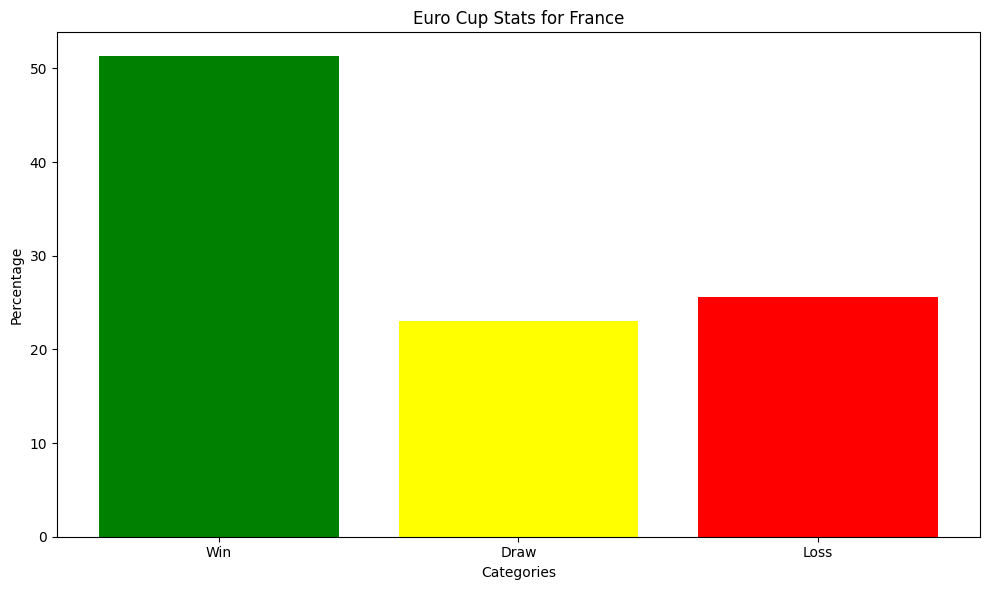

In [8]:
plot_team_statistics('France')

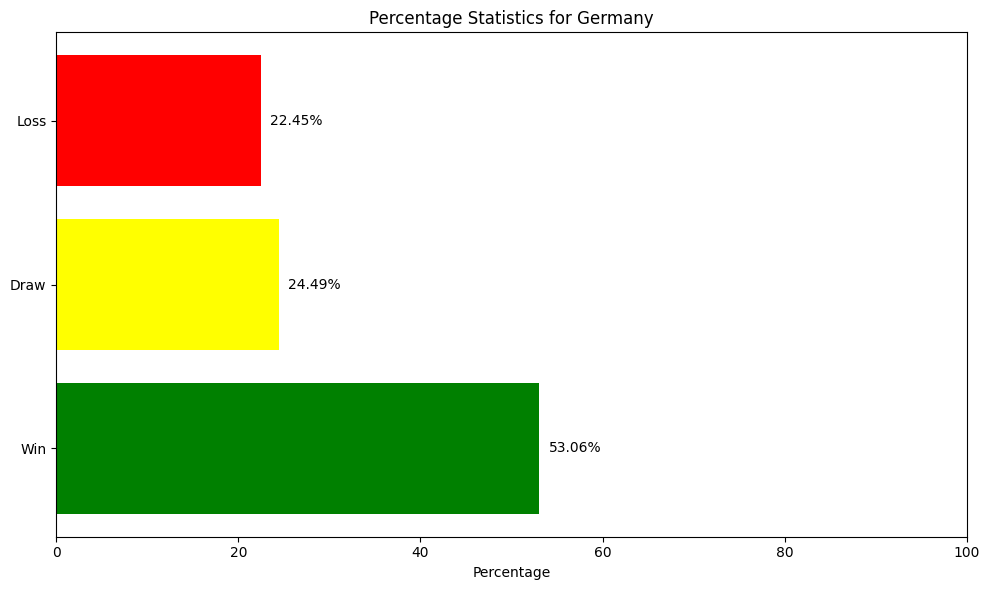

In [9]:
def plot_team_percentage(team_name):
    team_stats = participated_df_filter[participated_df_filter['Team'] == team_name].iloc[0]  # Get the row for the team

    # Extract relevant data
    categories = ['Win', 'Draw', 'Loss']
    percentages = [team_stats['Win_percentage'], team_stats['Draw_percentage'], team_stats['Loss_percentage']]

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    # Horizontal bar plot for percentages
    ax.barh(categories, percentages, color=['green', 'yellow', 'red'])
    ax.set_title(f'Percentage Statistics for {team_name}')
    ax.set_xlabel('Percentage')
    ax.set_xlim(0, 100)  # Set x-axis limit to 0-100 for percentage

    # Display the percentage values on bars
    for i, (percentage, category) in enumerate(zip(percentages, categories)):
        ax.text(percentage + 1, i, f'{percentage:.2f}%', va='center', color='black')

    # Adjust layout
    fig.tight_layout()
    plt.show()

# Example usage
team_name = 'Germany'
plot_team_percentage(team_name)